# Preprocessing Data

##Import Libary dan Dataset

In [1]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy import stats
import pyarrow as pa
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [2]:
# Melakukan Load dataset yang akan digunakan
jkt = pd.read_csv('https://github.com/alyaresti/FP_PMA/raw/main/Jakarta%202015%20-%202022.csv')
jkt.head(10)

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123
5,6/1/2014,213950,18293
6,7/1/2014,173914,18592
7,8/1/2014,224492,18872
8,9/1/2014,179723,19102
9,10/1/2014,184012,19282


In [3]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


## Memeriksa Missing Value

In [4]:
jkt.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

## Memeriksa Baris Duplikat

In [5]:
jumlah_baris_duplikat = jkt.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


## Merubah Format Time dan Set Index

In [6]:
jkt.rename(columns={'datetime': 'Periode'}, inplace=True)
jkt['Periode'] = pd.to_datetime(jkt['Periode'], format='%m/%d/%Y')
#jkt = jkt.set_index('Periode')
jkt.head()

,Periode,total_visitor,total_accomodation
0,2014-01-01,193017,16332
1,2014-02-01,185851,17101
2,2014-03-01,204004,17438
3,2014-04-01,186373,17943
4,2014-05-01,190716,18123


## Memeriksa Outliers

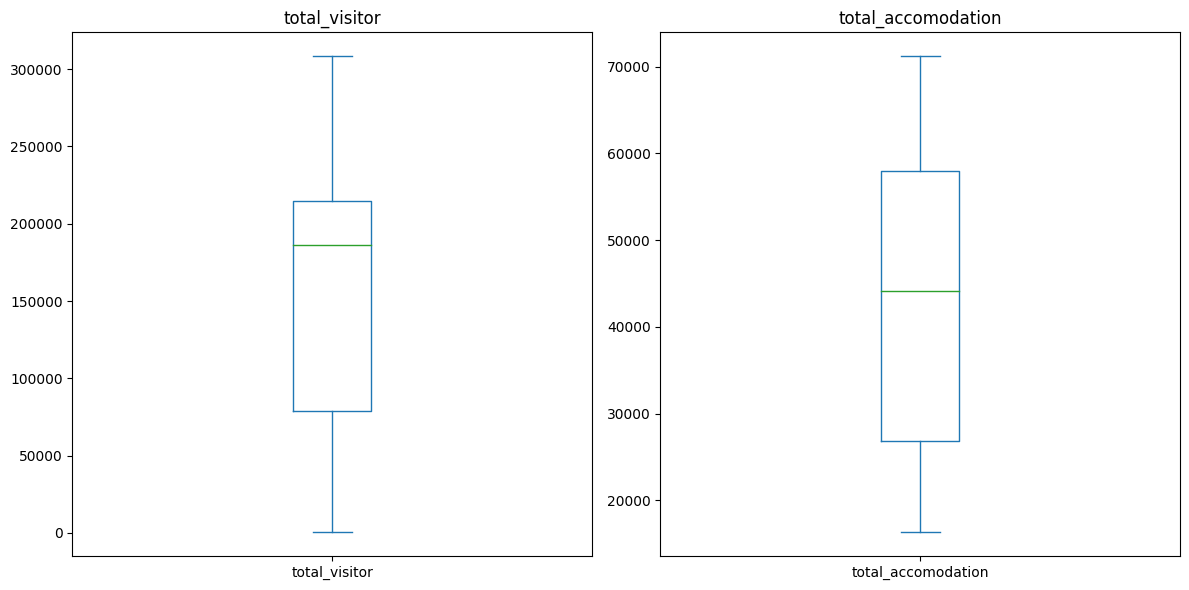

In [7]:
# Kolom data yang ingin ditampilkan
ratio_data = ['total_visitor', 'total_accomodation']

# Membuat satu gambar dengan dua subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Membuat boxplot dalam subplot
    jkt[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


# SVR

In [8]:
jkt_svr = jkt.copy()

In [9]:
jkt_shuffled = shuffle(jkt_svr, random_state=3)
X = jkt_shuffled.total_accomodation
y = jkt_shuffled.total_visitor

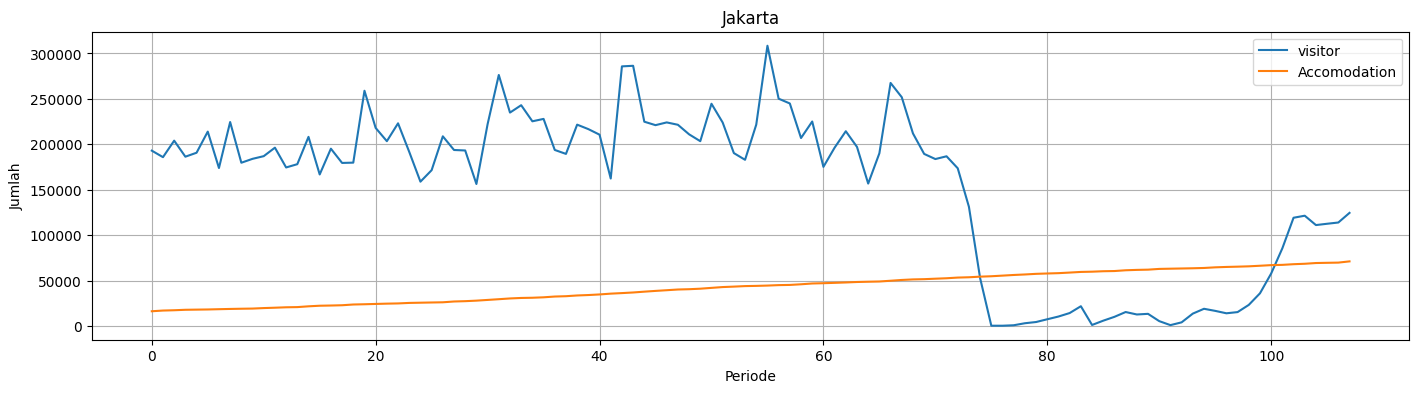

In [10]:
plt.figure(figsize=(17, 4))

plt.plot(jkt_svr['total_visitor'], label='visitor')
plt.plot(jkt_svr['total_accomodation'], label='Accomodation')

plt.grid()
plt.xlabel('Periode')
plt.ylabel('Jumlah')
plt.legend()
plt.title('Jakarta')
plt.show()

## Data Split 80% - 20%

### Splitting data train dan data tes

In [11]:
# Split the data into training and testing sets
jktsvr_train_80 = int(0.8 * len(y))
X_train_80, y_train_80 = X[:jktsvr_train_80], y[:jktsvr_train_80]
X_test_80, y_test_80 = X[jktsvr_train_80:], y[jktsvr_train_80:]

In [12]:
# Display results
lengths_80 = {
    'X_train_80': len(X_train_80),
    'y_train_80': len(y_train_80),
    'X_test_80': len(X_test_80),
    'y_test_80': len(y_test_80)
}

# Convert lengths to a Pandas DataFrame
lengths_80_df = pd.DataFrame.from_dict(lengths_80, orient='index', columns=['Length'])

print(lengths_80_df)


            Length
X_train_80      86
y_train_80      86
X_test_80       22
y_test_80       22


In [13]:
#Mengubah nilai input menjadi 2d
X_train80_2d = X_train_80.values.reshape(-1, 1)
X_test80_2d = X_test_80.values.reshape(-1,1)

### Hyperparameter tuning

In [14]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train80_2d, y_train_80)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.299 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.286 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.415 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.120 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.299 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.286 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.415 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=line

### Membuat dan Melatih Model SVR

In [15]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)
# Fit the SVR model
regressor.fit(X_train80_2d, y_train_80)

SVR(C=1, epsilon=0.01, kernel='linear')

### Melakukan Prediksi

In [16]:
# Predict
y_pred_80 = regressor.predict(X_test80_2d)

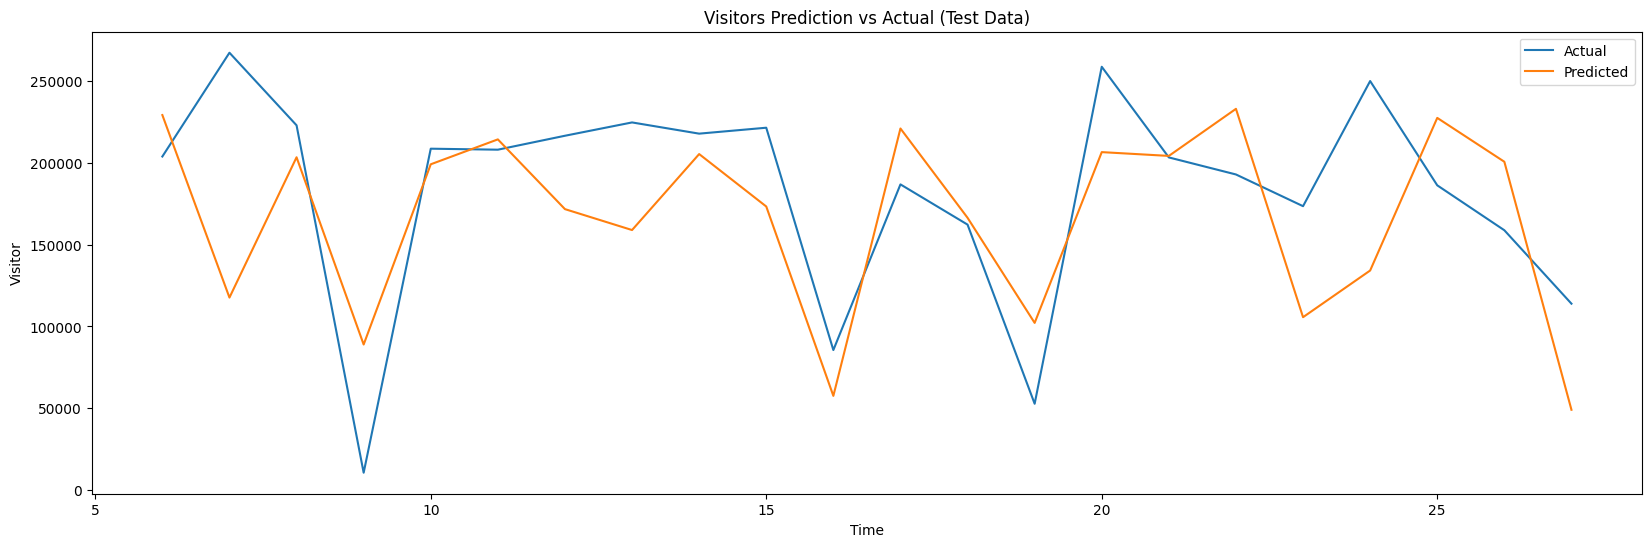

In [17]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asliZ
sequence_length = 6
plt.figure(figsize=(20, 6))
plt.plot(jkt_svr.index[sequence_length:y_test_80.shape[0]+sequence_length], y_test_80, label='Actual')
plt.plot(jkt_svr.index[sequence_length:y_pred_80.shape[0]+sequence_length], y_pred_80, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Evaluasi Model

In [18]:
# Menghitung MSE, RMSE, dan MAE prediksi menggunakan test
mse = mean_squared_error(y_test_80, y_pred_80)
mae = mean_absolute_error(y_test_80, y_pred_80)

# Menghitung MAPE
mape = np.mean(np.abs((y_test_80 - y_pred_80) / y_test_80)) * 100

# Menampilkan hasil
print("MSE :", round(mse, 2))
print("MAE:", round(mae, 2))
print("MAPE:", round(mape, 2), "%")

MSE : 3321380940.4
MAE: 45526.44
MAPE: 58.51 %


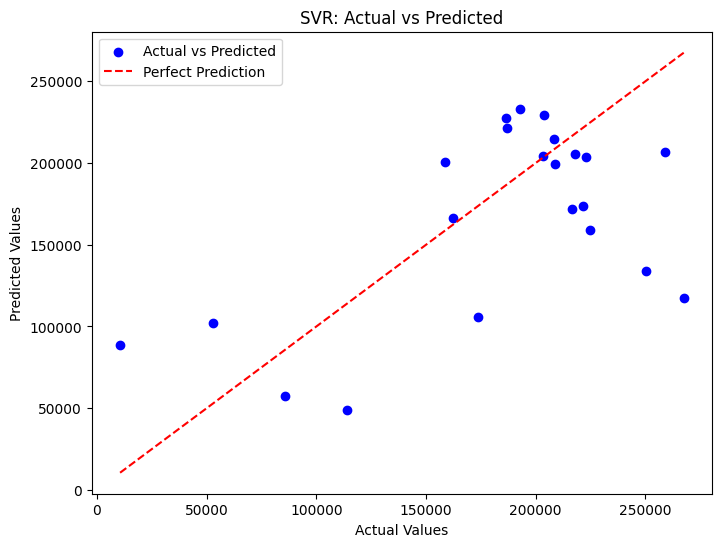

In [19]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))

plt.scatter(y_test_80, y_pred_80, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test_80), max(y_pred_80))
min_value = min(min(y_test_80), min(y_pred_80))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### Prediksi 12 bulan kedepan

In [20]:
# Mengambil tanggal terakhir dari kolom 'Periode'
tanggalakhir1 = jkt_svr['Periode'].iloc[-1]

# Menambahkan 1 bulan ke tanggal terakhir untuk mendapatkan awal prediksi
tanggalawal1 = tanggalakhir1 + pd.DateOffset(months=1)

# Membuat range tanggal untuk prediksi selama 12 bulan ke depanb
bulanprediksi1 = pd.date_range(start= tanggalawal1, periods=12, freq='M').tolist()

print(bulanprediksi1)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [21]:
from tabulate import tabulate
bulanforecast1 = []

for time_i in bulanprediksi1:
    bulanforecast1.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang bulanforecast1 dan y_pred_80
min_length = min(len(bulanforecast1), len(y_pred_80))
bulanforecast1 = bulanforecast1[:min_length]
y_pred_80 = y_pred_80[:min_length]

# Membuat DataFrame
jkt_svrprediksi80 = pd.DataFrame({'Periode': bulanforecast_1, 'total_visitor': y_pred_80})

# Melakukan konversi tanggal ke tipe datetime
jkt_svrprediksi80['Periode'] = pd.to_datetime(jkt_svrprediksi80['Periode'])

# Assuming 'original1' contains the original1 data with 'Datetime' and 'total_visitor' columns
original1 = jkt_svr[['Periode', 'total_visitor']]
original1['Periode'] = pd.to_datetime(original1['Periode'])
original1 = original1.loc[original1['Periode'] >= '2013-01-01']

# Combine 'original1' and 'jkt_svrprediksi80' DataFrames
gabung1 = pd.concat([original1, jkt_svrprediksi80])

# Sort the DataFrame by 'Periode'
gabung1 = gabung1.sort_values(by='Periode')

<ipython-input-21-5b18bb445a45>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original1['Periode'] = pd.to_datetime(original1['Periode'])


In [22]:
# Create a list of forecast dates and prediction values
data = list(zip(bulanforecast_1, map(int, y_pred_80)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table1 = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table1)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       229368 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       117695 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       203537 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        88973 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       199243 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       214483 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       171811 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       159014 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       205498 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       173421 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        57553 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

### Visualisasi

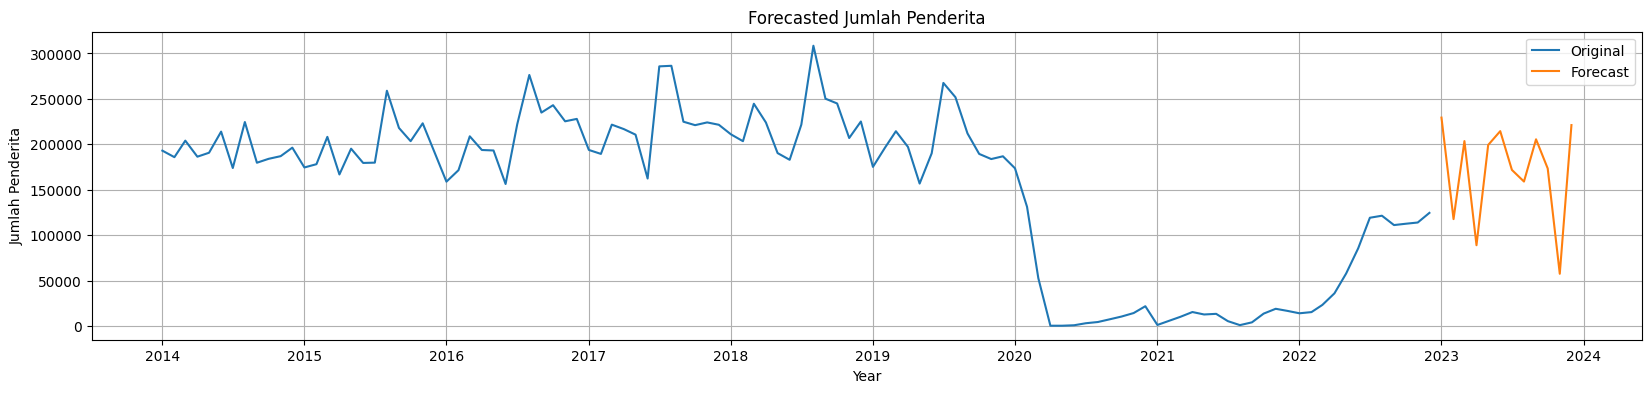

In [23]:
plt.figure(figsize=(20, 4))

# Your plotting code here
sns.lineplot(data=original1, x='Periode', y='total_visitor', label='Original')
sns.lineplot(data=jkt_svrprediksi80, x='Periode', y='total_visitor', label='Forecast')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()


## Data Split 70% - 30%

### Splitting data train dan data tes

In [24]:
# Split the data into training and testing sets
jktsvr_train_70 = int(0.7 * len(y))
X_train_70, y_train_70 = X[:jktsvr_train_70], y[:jktsvr_train_70]
X_test_70, y_test_70 = X[jktsvr_train_70:], y[jktsvr_train_70:]

In [25]:
# Display results
lengths_70 = {
    'X_train_70': len(X_train_70),
    'y_train_70': len(y_train_70),
    'X_test_70': len(X_test_70),
    'y_test_70': len(y_test_70)
}

# Convert lengths to a Pandas DataFrame
lengths_70_df = pd.DataFrame.from_dict(lengths_70, orient='index', columns=['Length'])

print(lengths_70_df)


            Length
X_train_70      75
y_train_70      75
X_test_70       33
y_test_70       33


In [26]:
#Mengubah nilai input menjadi 2d
X_train70_2d = X_train_70.values.reshape(-1, 1)
X_test70_2d = X_test_70.values.reshape(-1,1)

### Hyperparameter tuning

In [27]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train70_2d, y_train_70)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.287 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.753 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.241 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.313 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.441 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.287 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.753 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.241 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.313 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=line

### Membuat dan Melatih Model SVR

In [28]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)
# Fit the SVR model
regressor.fit(X_train70_2d, y_train_70)

SVR(C=1, epsilon=1, kernel='linear')

### Melakukan Prediksi

In [29]:
# Predict
y_pred_70 = regressor.predict(X_test70_2d)

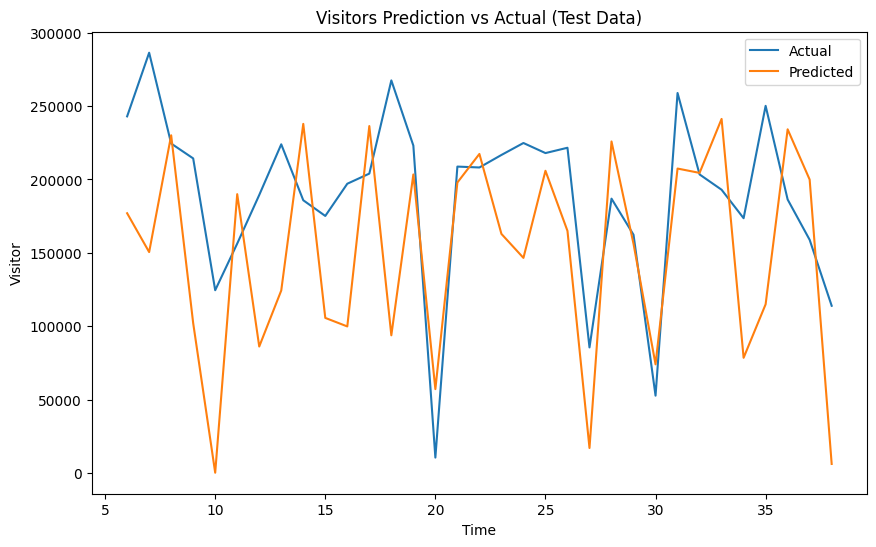

In [30]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(jkt_svr.index[sequence_length:y_test_70.shape[0]+sequence_length], y_test_70, label='Actual')
plt.plot(jkt_svr.index[sequence_length:y_pred_70.shape[0]+sequence_length], y_pred_70, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Evaluasi Model

In [31]:
# Menghitung MSE, RMSE, dan MAE prediksi dari data test
mse = mean_squared_error(y_test_70, y_pred_70)
mae = mean_absolute_error(y_test_70, y_pred_70)

# Menghitung MAPE
mape = np.mean(np.abs((y_test_70 - y_pred_70) / y_test_70)) * 100

# Menampilkan hasil
print("MSE :", round(mse, 2))
print("MAE:", round(mae, 2))
print("MAPE:", round(mape, 2), "%")

MSE : 5773686462.19
MAE: 62276.33
MAPE: 46.82 %


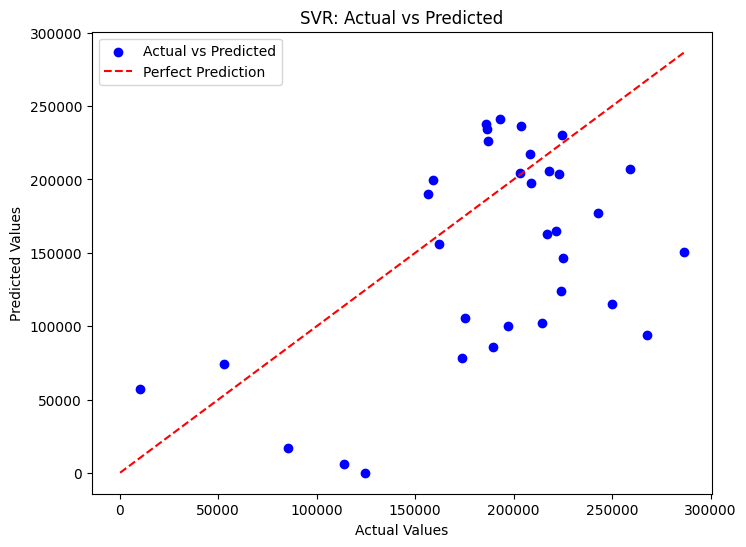

In [32]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_70, y_pred_70, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test_70), max(y_pred_70))
min_value = min(min(y_test_70), min(y_pred_70))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Prediksi 12 bulan kedepan

In [33]:
from tabulate import tabulate
bulanforecast2 = []

for time_i in bulanprediksi1:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang bulanforecast2 dan y_pred_70
min_length = min(len(bulanforecast2), len(y_pred_70))
bulanforecast2 = bulanforecast2[:min_length]
y_pred_70 = y_pred_70[:min_length]

# Membuat DataFrame
jkt_svrprediksi70 = pd.DataFrame({'Periode': bulanforecast_2, 'total_visitor': y_pred_70})

# Melakukan konversi tanggal ke tipe datetime
jkt_svrprediksi70['Periode'] = pd.to_datetime(jkt_svrprediksi70['Periode'])

# Assuming 'original2' contains the original1 data with 'Datetime' and 'total_visitor' columns
original2 = jkt_svr[['Periode', 'total_visitor']]
original2['Periode'] = pd.to_datetime(original2['Periode'])
original2 = original2.loc[original2['Periode'] >= '2013-01-01']

# Combine 'original2' and 'jkt_svrprediksi70' DataFrames
gabung2 = pd.concat([original2, jkt_svrprediksi70])

# Sort the DataFrame by 'Periode'
gabung2 = gabung2.sort_values(by='Periode')

<ipython-input-33-d9051fb46f71>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2['Periode'] = pd.to_datetime(original2['Periode'])


In [34]:
# Create a list of forecast dates and prediction values
data = list(zip(bulanforecast_2, map(int, y_pred_70)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table2)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       177006 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       150548 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       230103 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       102120 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │          218 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       190001 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        86196 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       124362 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       237883 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       105696 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        99880 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

### Visualisasi

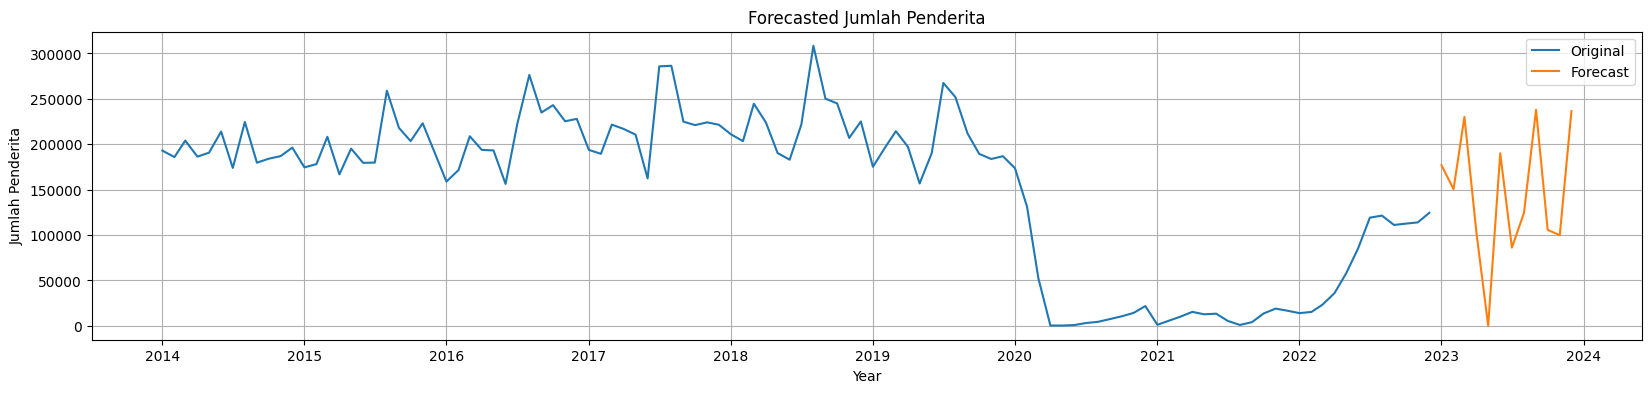

In [35]:
plt.figure(figsize=(20, 4))

# Your plotting code here
sns.lineplot(data=original2, x='Periode', y='total_visitor', label='Original')
sns.lineplot(data=jkt_svrprediksi70, x='Periode', y='total_visitor', label='Forecast')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()


## Data Split 60% - 40%

### Splitting data train dan data tes

In [36]:
# Split the data into training and testing sets
jktsvr_train_60 = int(0.6 * len(y))
X_train_60, y_train_60 = X[:jktsvr_train_60], y[:jktsvr_train_60]
X_test_60, y_test_60 = X[jktsvr_train_60:], y[jktsvr_train_60:]

In [37]:
# Display results
lengths_60 = {
    'X_train_60': len(X_train_60),
    'y_train_60': len(y_train_60),
    'X_test_60': len(X_test_60),
    'y_test_60': len(y_test_60)
}

# Convert lengths to a Pandas DataFrame
lengths_60_df = pd.DataFrame.from_dict(lengths_60, orient='index', columns=['Length'])

print(lengths_60_df)


            Length
X_train_60      64
y_train_60      64
X_test_60       44
y_test_60       44


In [38]:
#Mengubah nilai input menjadi 2d
X_train60_2d = X_train_60.values.reshape(-1, 1)
X_test60_2d = X_test_60.values.reshape(-1,1)

### Hyperparameter tuning

In [39]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=3,
    error_score='raise'
)

# Fit the model with the best parameters
grid_search.fit(X_train80_2d, y_train_80)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.299 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.286 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.415 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.120 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.299 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.286 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.415 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=line

### Membuat dan Melatih Model SVR

In [40]:
best_param = grid_search.best_params_
# Create SVR model
regressor = SVR(**best_param)
# Fit the SVR model
regressor.fit(X_train60_2d, y_train_60)

SVR(C=1, epsilon=0.01, kernel='linear')

### Melakukan Prediksi

In [41]:
# Predict
y_pred_60 = regressor.predict(X_test60_2d)

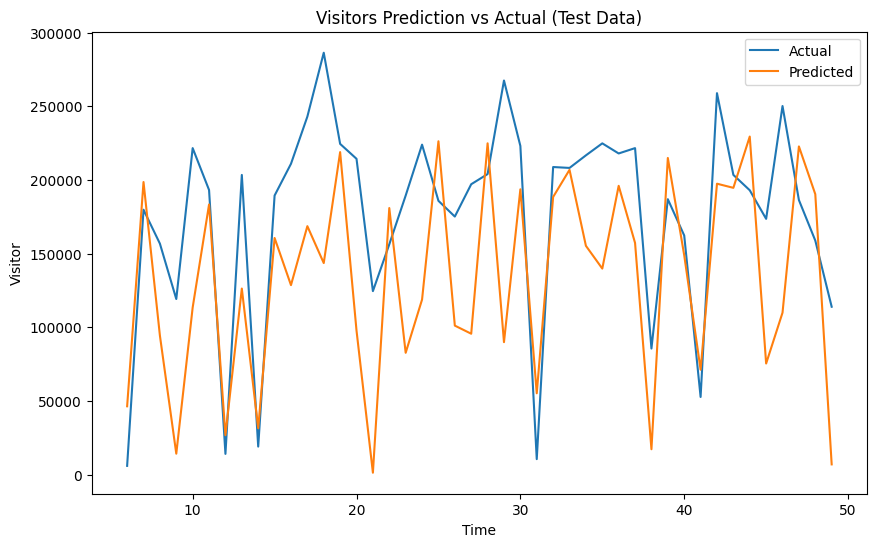

In [42]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
sequence_length = 6
plt.figure(figsize=(10, 6))
plt.plot(jkt_svr.index[sequence_length:y_test_60.shape[0]+sequence_length], y_test_60, label='Actual')
plt.plot(jkt_svr.index[sequence_length:y_pred_60.shape[0]+sequence_length], y_pred_60, label='Predicted')
plt.title('Visitors Prediction vs Actual (Test Data)')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

### Evaluasi Model

In [43]:
# Menghitung MSE, RMSE, dan MAE
mse = mean_squared_error(y_test_60, y_pred_60)
mae = mean_absolute_error(y_test_60, y_pred_60)

# Menghitung MAPE
mape = np.mean(np.abs((y_test_60 - y_pred_60) / y_test_60)) * 100

# Menampilkan hasil
print("MSE :", round(mse, 2))
print("MAE:", round(mae, 2))
print("MAPE:", round(mape, 2), "%")

MSE : 5519396462.23
MAE: 60182.76
MAPE: 60.21 %


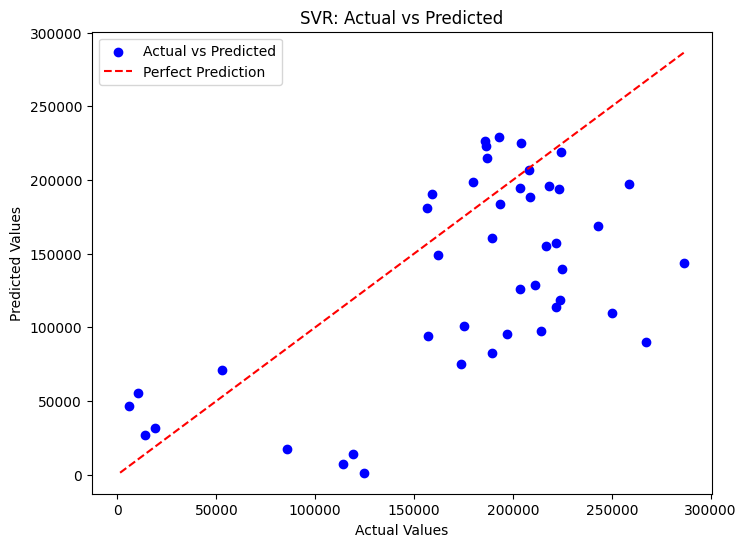

In [44]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))

plt.scatter(y_test_60, y_pred_60, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test_60), max(y_pred_60))
min_value = min(min(y_test_60), min(y_pred_60))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### Prediksi 12 Bulan Kedepan

In [45]:
from tabulate import tabulate
bulanforecast3 = []

for time_i in bulanprediksi1:
    bulanforecast3.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_3 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Memastikan panjang forecast_dates dan y_pred_60 sama
min_length = min(len(bulanforecast3), len(y_pred_60))
bulanforecast3 = bulanforecast3[:min_length]
y_pred_60 = y_pred_60[:min_length]

# Membuat DataFrame
jkt_svrprediksi60 = pd.DataFrame({'Periode': bulanforecast_3, 'total_visitor': y_pred_60})

# Melakukan konversi tanggal ke tipe datetime
jkt_svrprediksi60['Periode'] = pd.to_datetime(jkt_svrprediksi60['Periode'])

# Assuming 'original1' contains the original1 data with 'Datetime' and 'total_visitor' columns
original3 = jkt_svr[['Periode', 'total_visitor']]
original3['Periode'] = pd.to_datetime(original3['Periode'])
original3 = original2.loc[original3['Periode'] >= '2013-01-01']

# Combine 'original1' and 'jkt_svrprediksi60' DataFrames
gabung3 = pd.concat([original3, jkt_svrprediksi60])

# Sort the DataFrame by 'Periode'
gabung3 = gabung3.sort_values(by='Periode')

<ipython-input-45-ba519f4ab607>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original3['Periode'] = pd.to_datetime(original3['Periode'])


In [46]:
# Create a list of forecast dates and prediction values
data = list(zip(bulanforecast_3, map(int, y_pred_60)))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table3)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        46400 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       198611 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        94407 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        14237 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       113447 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       183355 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        26790 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       126296 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        31476 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       160634 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       128637 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

### Visualisasi

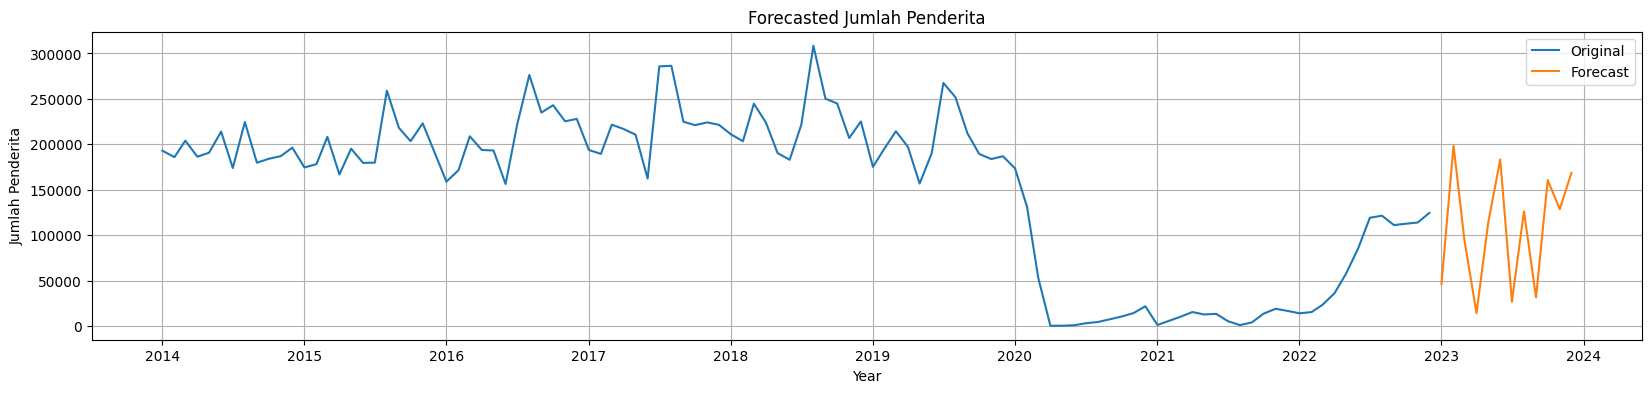

In [47]:
plt.figure(figsize=(20, 4))

# Your plotting code here
sns.lineplot(data=original3, x='Periode', y='total_visitor', label='Original')
sns.lineplot(data=jkt_svrprediksi60, x='Periode', y='total_visitor', label='Forecast')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.grid()
plt.legend()
plt.show()
